In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from tqdm import tqdm
from numpy.random import poisson, gamma, choice

In [3]:
# Set the seed
np.random.seed(0)

Fix $b\in \mathbb{N}$, $b\ge 1$. 

For a non-negative integer valued r.v. $R$ let $\Gamma(R)$ denote a continuous random variable, whose distribution, conditional on $R = r$, is $\mathrm{Gamma}(r,1)$. For non-negative real-valued $Y$, let $\mathcal{P}(Y)$ denote a discrete r.v. whose distribution, conditional on $Y = y$, is $\mathrm{Poisson}(y)$.

We would like to study the convergence of the sequence of random variables $(R_m)_{m\ge 0}$ where $R_0 \stackrel{a.s.}{=} 1$, and for $m \ge 0$, 
\begin{equation}
R_{m+1} \stackrel{d}{=} 1 + \mathcal{P}\left(\max_{1 \le j \le b} \Gamma(R_m^j)\right)
\end{equation}
where for $j\in \mathbb{N}$, $R_m^j$ are independent copies of $R_m$.

We will use the numerical and Monte Carlo methods as described in "A Survey of Max-Type Recursive Distributional Equations" by David Aldous and Antar Bandyopadhyay.

Start with a list of $N = 10,000$ numbers with some empirical distribution $\mu$. Regard these as "generation-0" individuals, $(R_0^j, 1 \le j \le N)$. We then obtain $N$ "generation-1" individuals, $(R_1^j, 1 \le j \le N)$, independently via the following procedure. 

For $i\in [N]$: 
- Sample $b$ independent uniform samples from $\{1,...,N\}$, $I_1,...,I_b$. 
- If $Q = 0$, let $R^i_1 = 1 + \mathcal{P}(0)$.
- Otherwise, let 
\begin{equation}
R^i_1 = 1 + \mathcal{P}\left(\max_{1\le j \le b} \Gamma(R_0^{I_j})\right)
\end{equation}

Repeat this procedure to reach the the generation you are interested in, and create a displot using the samples.

In [4]:
def get_R(M, init_dist, b):
    
    # Inputs: 
    # - M: the depth of the recurrence we would like to reach
    # - init_dist: samples from the initial distribution 
    
    # Output: 
    # - R_M: samples from the distribution of R_M
    
    num_samps = len(init_dist)
    R_M = init_dist
    
    # If no recursion needed return the initial samples
    if M == 0: return np.array(R_M)
    
    # Otherwise we need to build up the samples through a bootstrap Monte Carlo method
    for m in tqdm(range(M)):
        temp = []
        
        # General one sample using the recursion
        for i in range(num_samps):
            indicies = np.random.randint(0,num_samps, b)
            R_Mj = [gamma(R_M[j]) for j in indicies]
            temp.append(1.0 + poisson(np.max(R_Mj)))
           
        # All samples at level m are obtained, move to next level
        R_M = temp
    
    # Final level of recursion obtained, return samples
    R_M = np.array(R_M)
    return R_M

In [ ]:
# Compute the scaled empirical distributions and their means up until N = 150000, in increments of 1000
init_dist = np.ones(int(1e+4))
R = []
means = [1]
i=1000
while i<= 200000:
    init_dist = get_R(1000, init_dist,2)
    means.append(np.mean(init_dist))
    R.append(init_dist/(i**2))
    i+=1000

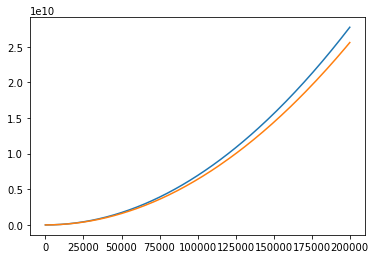

In [7]:
# See if the means coincide with the conjecture from Aldous
x = [1000*a for a in range(len(R)+1)]
target_means = [math.log(2)*(a**2) for a in x]
plt.plot(x,target_means)
plt.plot(x,means)

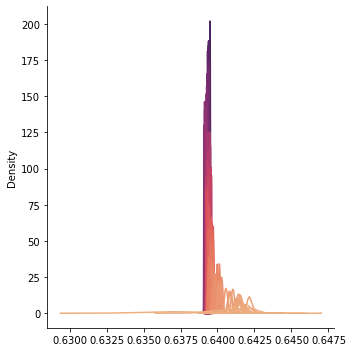

In [10]:
# Plot the empirical cumulative distributions to see if we can achieve convergence
sns.displot(R, palette = 'flare', kind = 'kde', cumulative = False, legend = False)

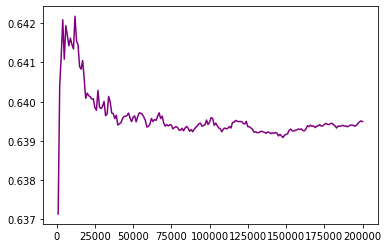

In [14]:
# Try and see what the mean of the limiting distribution is
scaled_means = [np.mean(r) for r in R]
plt.plot(x[1:], scaled_means, color = 'purple')

In [12]:
# Try and see what the mean is that we are approaching:
print('Estimated mean:')
print(np.mean(scaled_means[100:]))

print('Analytic mean:')
print(np.log(2))

Estimated mean:
0.6393422007716283
Analytic mean:
0.6931471805599453
